# Trabajo de Fin de Master
Sergio Marchena
UNAV - 2024

In [1]:
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json as json

In [105]:
file_path = 'apikey.txt'
with open(file_path, 'r') as file:
    file_contents = file.read()

api_key = file_contents

In [103]:
url = "https://api.footprint.network/api/v1/native/async"

query = " select * from token_price_5min where token_symbol = 'RIF' limit 1 "

query2 = " select date(timestamp) as Date, avg(price) as Price, token_symbol as Symbol from token_price_5min where token_symbol in ('DOC','RIF') and chain = 'Rootstock' group by 1,3 order by 1 desc limit 180 "
query2 = query2 [1:-1]
query3 = " select * from protocol_transactions where chain = 'Ethereum' " 
query4  = " select * from ethereum_transactions " 

query2 = query4 [1:-1]
print(query2)

payload = { "query": query2}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "api-key": api_key
}

response = requests.post(url, json=payload, headers=headers).json()
ok = response['message']
print(response)
execution_id = response['data']['execution_id']

print(ok)
print(execution_id)


select * from ethereum_transactions
{'message': 'success', 'code': 0, 'data': {'state': 'INIT', 'execution_id': '8529be9f-5b6b-433c-9d16-21ba4f59ac44'}}
success
8529be9f-5b6b-433c-9d16-21ba4f59ac44


In [104]:
url = 'https://api.footprint.network/api/v1/native/' + execution_id + '/results?limit=1000'

headers = {
    "accept": "application/json",
    "api-key": api_key
}

response = requests.get(url, headers=headers).json()

respuesta = response['data']['result']
print(response)

df = pd.DataFrame(respuesta)
df


{'message': 'success', 'code': 0, 'data': {'execution_id': '8529be9f-5b6b-433c-9d16-21ba4f59ac44', 'state': 'SUCCESS', 'submitted_at': '2024-05-28T00:15:31.000Z', 'expires_at': '2024-05-29T00:15:46.000Z', 'finished_at': '2024-05-28T00:15:46.000Z', 'total': '100000', 'error_message': None, 'result': [{'block_number': 15786848, 'hash': '0x8939702b332451dce59e93307cfad6476e18307615bb3b9ba1c1d2ea686d57ce', 'nonce': 2794, 'transaction_index': 12, 'from_address': '0xf8d45c9204defe8b4bd4a4961a708d4689094bbf', 'to_address': '0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 'value': '150000000000000000.000000000', 'gas': 328293, 'gas_price': 26000000000, 'input': '0x7ff36ab5000000000000000000000000000000000000000000000000001ea3690cee25ae0000000000000000000000000000000000000000000000000000000000000080000000000000000000000000f8d45c9204defe8b4bd4a4961a708d4689094bbf00000000000000000000000000000000000000000000000000000183f8bf4ddd00000000000000000000000000000000000000000000000000000000000000020000000000

,block_number,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,...,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_hash,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,receipt_effective_gas_price,block_timestamp
0,15786848,0x8939702b332451dce59e93307cfad6476e18307615bb...,2794,12,0xf8d45c9204defe8b4bd4a4961a708d4689094bbf,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,150000000000000000.000000000,328293,26000000000,0x7ff36ab5000000000000000000000000000000000000...,...,31435,None,None,0,0x3123bfc2567a7bca52a537e51e202e83253d2d88c2b4...,NaN,NaN,0,26000000000,2022-10-20 04:13:59.000 UTC
1,15787172,0x48fe16f777e04624049e1d8018c3a862a7b1f5acaa6c...,2803,1,0xf8d45c9204defe8b4bd4a4961a708d4689094bbf,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,500000000000000000.000000000,317137,120000000000,0x7ff36ab5000000000000000000000000000000000000...,...,151714,None,None,1,0xcc28b95e587e5386ca9422c6ba2fbf06672f843ea3ba...,NaN,NaN,0,120000000000,2022-10-20 05:18:47.000 UTC
2,15786803,0x0e701fb15fb118907cff255b929a9f021b3d84ddd14f...,2790,11,0xf8d45c9204defe8b4bd4a4961a708d4689094bbf,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,500000000000000000.000000000,366602,24000000000,0x7ff36ab5000000000000000000000000000000000000...,...,200408,None,None,1,0xbbcc3fca036777a0e7096972a09984eba7915a7db7f1...,NaN,NaN,0,24000000000,2022-10-20 04:04:59.000 UTC
3,15786760,0x549b9ae55095dee33ab12fa3ca0a2a4ca88b5047b6c7...,2787,49,0xf8d45c9204defe8b4bd4a4961a708d4689094bbf,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.000000000,402427,28000000000,0x791ac947000000000000000000000000000000000000...,...,273124,None,None,0,0x2a4fd7c3ca66c0c1d05bbcea7ede58a4405c2c0a204d...,NaN,NaN,0,28000000000,2022-10-20 03:56:23.000 UTC
4,15789498,0xc87f37c412b80deaae85ad200746ae3cb33943d91b36...,2822,7,0xf8d45c9204defe8b4bd4a4961a708d4689094bbf,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,300000000000000000.000000000,346807,124000000000,0x7ff36ab5000000000000000000000000000000000000...,...,31525,None,None,0,0xb9a8a200d64e49f15c127c7c73554202329a2d1bd122...,NaN,NaN,0,124000000000,2022-10-20 13:06:23.000 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15790294,0xe682aafa3769afe317b8a0c418de775172d095bca085...,23,19,0xf9083346e2f548d34e95e728a2ea16663fd097eb,0x115b48b11598ed081ee24dd77cde496a0696ec1f,24583570000000000.000000000,21000,45000000000,0x,...,21000,None,None,1,0xb13e8d9ed1155e3de62604840a2cf3eea13ca93ad59e...,NaN,NaN,0,45000000000,2022-10-20 15:46:23.000 UTC
996,15790736,0x897c88b031e80631b65288422efd9ad9c2fc2d3603dc...,0,70,0xf9083ec80a620b277916400a3b8989b203a6d277,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000000,48561,80799516440,0x095ea7b300000000000000000000000063a22a1210f0...,...,48561,None,None,1,0x79ac253e898ed08cb5c5db420e02cc204ed19b9a98aa...,1.868095e+11,2.500000e+09,2,80799516440,2022-10-20 17:14:47.000 UTC
997,15786641,0x562957dfacdaf104b29a96b45d7a856d27be9d69461f...,1,30,0xf90844ead812066b23a8db21df45b206d3a1bbed,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000000,46097,18160413410,0xa9059cbb0000000000000000000000007a7854db1aac...,...,46097,None,None,1,0xa9029398de0215ceb2e2ed1d5d633ddde8263fe68d95...,NaN,NaN,0,18160413410,2022-10-20 03:32:23.000 UTC
998,15786635,0xf5fc7371b1997db144c33da586b72561a69bd9bb4388...,0,160,0xf90844ead812066b23a8db21df45b206d3a1bbed,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000000,46097,18160413410,0xa9059cbb0000000000000000000000007a7854db1aac...,...,46097,None,None,1,0x737056ec11ea63a92203d98d8b9c5bf5a0b53a55daf3...,NaN,NaN,0,18160413410,2022-10-20 03:31:11.000 UTC


In [61]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['value'].dtype

dtype('float64')

In [86]:
new_df=df[(df['value'] > 0) & (df['block_timestamp'] > '2024-01-01')]
new_df

,block_number,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,...,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_hash,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,receipt_effective_gas_price,block_timestamp
12,19857683,0x4af39dcdba5ac7bec26b8d6f19dfdb244f61ee546f9b...,4,140,0xfc797953e70e6566288d85aca45dc3b62ccbb10a,0xfc797953e70e6566288d85aca45dc3b62ccbb10a,1.800000e+16,21000,3398608974,0x,...,21000,None,None,1,0xb9fb021234571fcc0f3058c1d6de63051f5eaf9d918b...,4.166383e+09,9409000.0,2,3398608974,2024-05-13 01:01:23+00:00
13,19858364,0xd4c3712329172524140e6a0215b759c765f712c0e823...,2,61,0xfc7bddec59e57d47449cdb1d0a15cfba4c5b99bf,0x7ad51ba2172668d437938a5506c9411182352915,3.953371e+16,21000,6452064272,0x,...,21000,None,None,1,0x7ac14cc44aae32487076cb2114d1a08e6b1513565e82...,NaN,NaN,0,6452064272,2024-05-13 03:18:35+00:00
14,19858969,0x1298e1ab8a76b150530168758eb34712db98e7ef7666...,1667,100,0xfc7d36f09f0610ca72457aaa85e933ed07629b5f,0xfe30a678f8dbfcd1188ff6392071cd0241e76bad,5.000000e+18,21000,3601528855,0x,...,21000,None,None,1,0x87b2fbe7ed5af48b2cd47a8ba3789990c889cafe8c5e...,4.619678e+09,29782184.0,2,3601528855,2024-05-13 05:20:59+00:00
22,19858469,0x1026663e10050efddef33ca2ce308764cc09bcf70e7e...,0,807,0xfc83dce8b59f758dc9ef65dc1921cbc9c9365cb5,0x4c8d874f4a116603626e29eb4cb3ffb5ab2e35a9,9.160000e+14,21000,3509857821,0x,...,21000,None,None,1,0xd51aa72e032fb12b4f7285eda614171d948d31b79d5e...,4.000000e+09,0.0,2,3509857821,2024-05-13 03:39:47+00:00
24,19858385,0x0200b5048249e97f9b0c0a358cb3fb9d4ac4ca694bec...,14,90,0xfc859a9fd83ec8a94e849bf3239e483610359065,0x3f6ce1b36e5120bbc59d0cfe8a5ac8b6464ac1f7,1.050000e+17,938925,4819850841,0xb1a1a882000000000000000000000000000000000000...,...,202109,None,None,1,0xc64f6e1e52e6e3f8cc9eaa8b1fe3cd6c742f2b4ccf22...,5.705207e+09,216503931.0,2,4819850841,2024-05-13 03:22:47+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,19858085,0x8d1f46fdca477b86c15566a2d77b30cc465e27af0abb...,172689,28,0xff82bf5238637b7e5e345888bab9cd99f5ebe331,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,8.116736e+06,228870,4121810486,0x78e111f60000000000000000000000002c6e668d3a4b...,...,111674,None,None,1,0x8ecc3d0b19e3d7beb028d50758a4605792515dcd9f82...,6.182716e+09,0.0,2,4121810486,2024-05-13 02:22:35+00:00
977,19858110,0x90e6b24284bafb721fca151553c7e2ecd35deaf4f7a8...,172691,33,0xff82bf5238637b7e5e345888bab9cd99f5ebe331,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,8.148736e+06,217670,4513110886,0x78e111f6000000000000000000000000fd535c678df1...,...,108843,None,None,1,0x6a593f648accb8fd3a2182b1c66c7b8ecafaa24c8d34...,6.769666e+09,0.0,2,4513110886,2024-05-13 02:27:35+00:00
979,19858213,0x2a4a57ca442e54557f1ea42b46add9cf92ec36c3c3f4...,0,112,0xff85dc32246e7bd400f4f22c52eff6eb59b39bc8,0x6774bcbd5cecef1336b5300fb5186a12ddd8b367,6.752048e+17,146049,4329060881,0xb2267a7b000000000000000000000000ff85dc32246e...,...,138667,None,None,1,0x19ae7337aa4942ffc80345c656b8da305c41c866fba2...,5.536836e+09,19542224.0,2,4329060881,2024-05-13 02:48:23+00:00
989,19858794,0x41b700dedc6873f7b3ea2c89be848df44385a22dd12a...,2,111,0xff87b0097a9c4b087019f0ea7e0e352942931287,0xb4acbfe08bf5819dfb0047b41490df92b14bb0b7,9.005884e+15,21000,3307598145,0x,...,21000,None,None,1,0xe6bf680ed35fcd8da34abd402eb5fdebb7e4550e4f5d...,NaN,NaN,0,3307598145,2024-05-13 04:45:47+00:00


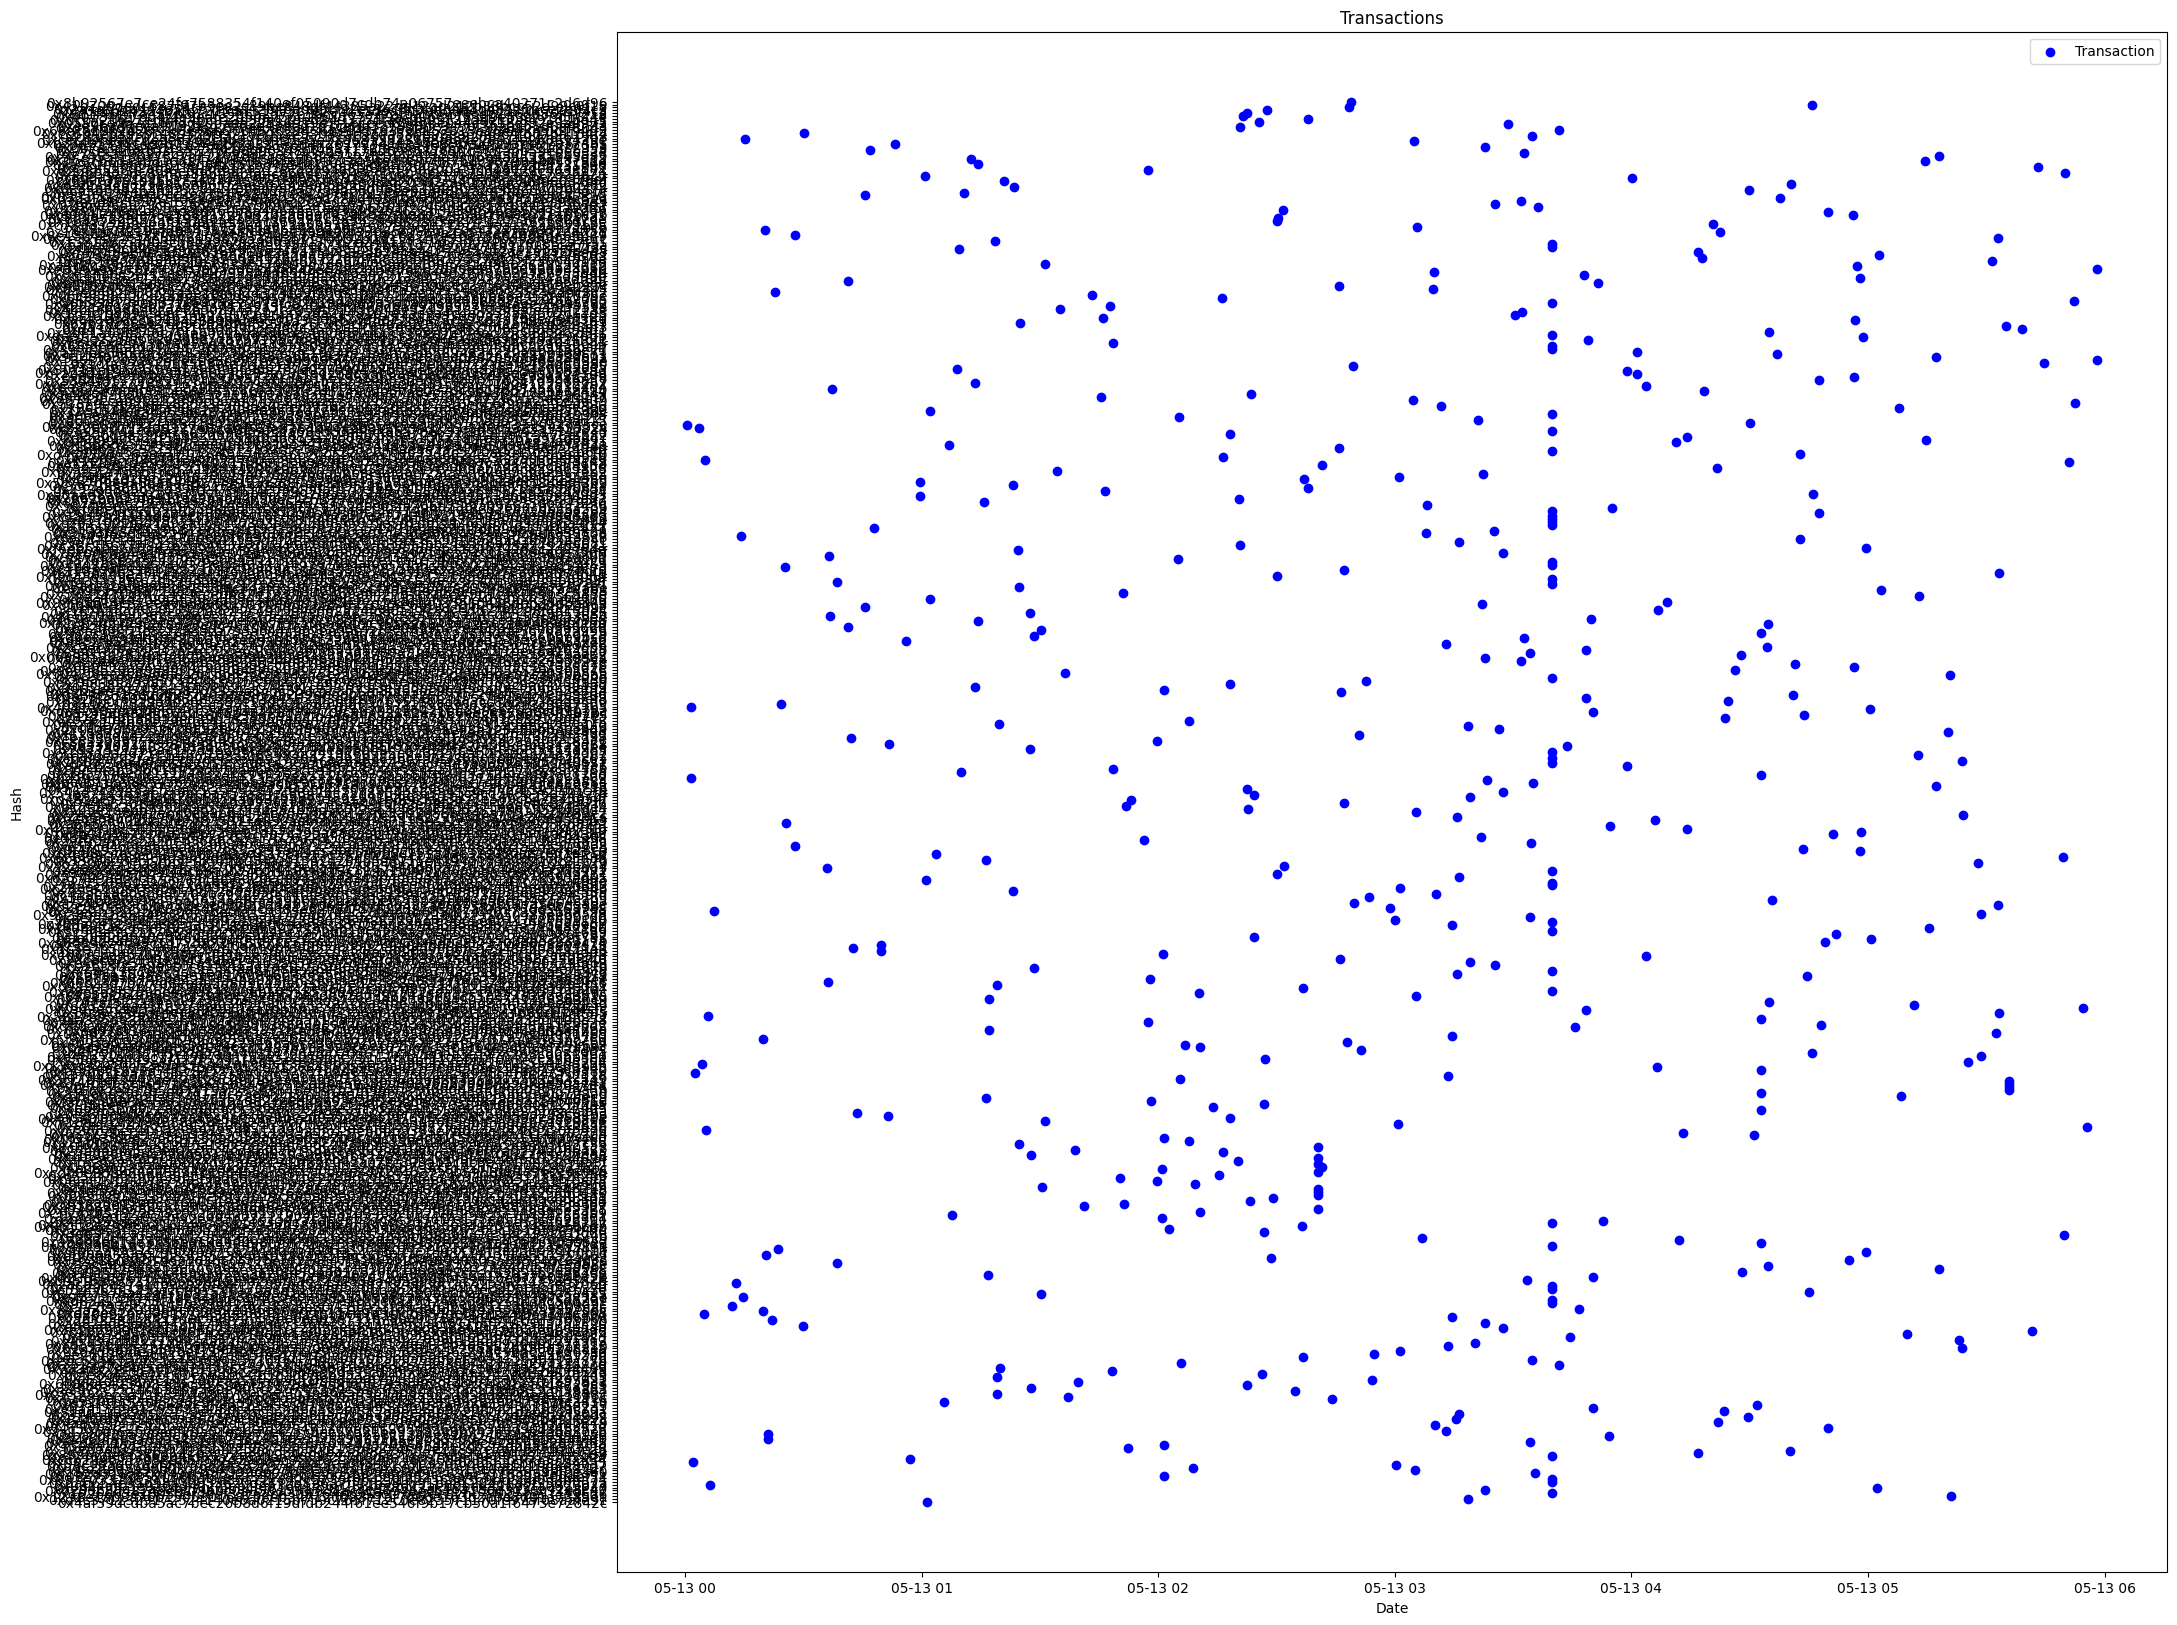

In [92]:
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])

plt.figure(figsize=(20, 20))

plt.scatter(
    x=new_df['block_timestamp'], 
    y = new_df['hash'], 
    label='Transaction', 
    color='blue')

plt.xlabel('Date')
plt.ylabel('Hash')
plt.title('Transactions')
plt.legend()

plt.show()

- age_of_addreses = diff entre 1st txn y dia de hoy
- total_Assets
- quality_of_held_assets: protocolos mas confiables 

addres_ideal: elegirla yo. y describirla.
arkham

1. definir los features de la ideal_Addresss.
2. buscar en Ethereum una base de datos con esas addresses.
3. buscar risky addresses por la misma cantidad.
4. feature engineering: evaluar el dataset: EDA. 
5. probar 4 modelos de clasificacion.
6. Presentar resultados con metricas 
7. Escribir la memoria.

## KAGGLE FRAUD DETECTION DATASET

In [126]:
#!pip install kaggle
# https://bobrupakroy.medium.com/ethereum-fraud-detection-ba4e1d8b262a

In [108]:
!kaggle datasets download -d rupakroy/ethereum-fraud-detection

Dataset URL: https://www.kaggle.com/datasets/rupakroy/ethereum-fraud-detection
License(s): CC0-1.0
100%|████████████████████████████████████████| 923k/923k [00:00<00:00, 1.90MB/s]
100%|████████████████████████████████████████| 923k/923k [00:00<00:00, 1.89MB/s]


In [125]:
data = pd.read_csv('transaction_dataset.csv')
data = data.iloc[:,2:]
data.columns = data.columns.str.replace(' ', '')
data

,Address,FLAG,Avgminbetweensenttnx,Avgminbetweenreceivedtnx,TimeDiffbetweenfirstandlast(Mins),Senttnx,ReceivedTnx,NumberofCreatedContracts,UniqueReceivedFromAddresses,UniqueSentToAddresses,...,ERC20minvalsent,ERC20maxvalsent,ERC20avgvalsent,ERC20minvalsentcontract,ERC20maxvalsentcontract,ERC20avgvalsentcontract,ERC20uniqsenttokenname,ERC20uniqrectokenname,ERC20mostsenttokentype,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


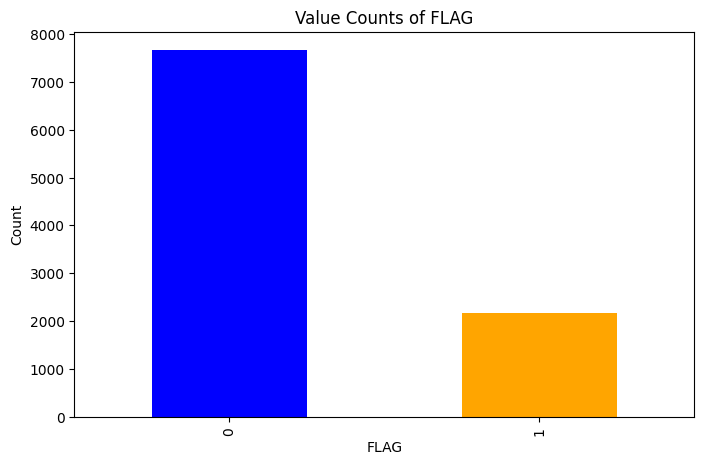

In [124]:
flag = data['FLAG'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
flag.plot(kind='bar', color=['blue', 'orange'])

# Adding titles and labels
plt.title('Value Counts of FLAG')
plt.xlabel('FLAG')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from collections import Counter


len(Counter(dataset.Address))
def counts (data):
    counts = Counter(data)
    print(counts)
    print("length",len(counts))
counts(dataset.Address)
counts(dataset.ERC20_most_rec_token_type)
counts(dataset.ERC20mostsenttokentype)
d =dataset.groupby(dataset.ERC20mostsenttokentype).mean()
X = d.iloc[:,1:]
y =  d["FLAG"]
y = np.round(y).astype(int)
y.groupby(y).size()
#Class imbalance issue
X.isna().any()
def outlier_dec(data):
    sns.boxplot(data)
    
outlier_dec(X.Avgminbetweensenttnx)
#----------------------------------------------------------
# Create correlation matrix
corr_matrix = X.corr().abs()
#------Remove the highly correlated variables----------------------
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
# Drop features 
X.drop(to_drop, axis=1, inplace=True)
#Drop columns that have 1 unique value -------------------------
X.loc[:,X.nunique()!=1]
X.drop(columns=X.columns[X.nunique()==1], inplace=True)
X = X.values
#----------------------------
def evaluation_score (y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred) 
    print("Confusion Matrix \n", cm)
    print('Balanced Accuracy ',metrics.balanced_accuracy_score(y_test,y_pred))
    print("Recall Accuracy Score~TP",metrics.recall_score(y_test, y_pred))
    print("Precision Score ~ Ratio of TP",metrics.precision_score(y_test, y_pred))
    print("F1 Score",metrics.f1_score(y_test, y_pred))
    print("auc_roc score", metrics.roc_auc_score(y_test,y_pred))
    print("Classification Report", classification_report(y_test,y_pred))
    
    
def cross_validation(model,X_train,y_train,n):
    kfold = KFold(n_splits=10)  
    accuracies = cross_val_score(model,X= X_train,y= y_train,cv = kfold,scoring='accuracy')
    print("Standard Deviation",accuracies.std())
    print("Mean/Avergae Score",accuracies.mean())
#----------------------------
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 150,max_depth=100)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
#Accuracy SCore
evaluation_score(y_test, y_pred)
cross_validation(rf_model,X_train,y_train,10)
#----------- WITH SMOTE
y 
X
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)
#----------------------------------------------
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2,sampling_strategy=1) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
def train_model(n,max_d):
    rf_model = RandomForestClassifier(n_estimators=n,max_depth=max_d)
    rf_model.fit(X_train_res,y_train_res.ravel())
    predictions = rf_model.predict(X_test)
    return predictions
def show_predictions(data):
    results = rf_model.predict(data)
    return results 
    
    
train_model_predictions = train_model(500,100)
#Accuracy Score--------------------------------------
evaluation_score(y_test, train_model_predictions)
cross_validation(rf_model,X_train,y_train,10)
#Select the best model------------------------------------------
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['random_forest'] = RandomForestClassifier()
    models['bayes'] = GaussianNB()
    return models
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()
#GridSeachCV -----
from sklearn.model_selection import GridSearchCV
p = [{'n_estimators':[50,100,150],'max_depth':[10, 100]}]
'''p = [{'n_estimators':[50,100,150],'max_depth':[10, 100],
               'min_samples_split':[2,3,4,5,6,7,8,9,10],'min_samples_leaf':[2,3,4,5],
               'min_impurity_decrease':[2,3,4,5],'max_features':["auto","sqrt","log2"]}]'''
grid_search = GridSearchCV(estimator = rf_model,param_grid= p, scoring = "accuracy",cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("best accuracy , best_paramters", best_accuracy, best_parameters)
#-------------------------------------------
train_model_predictions1= train_model(100,10)
#Accuracy Score
evaluation_score(y_test, train_model_predictions1)
cross_validation(rf_model,X_train,y_train,10)
show_predictions(new_data)